In [1]:
import matplotlib.pyplot as plt
import sxs
import numpy as np
import astropy.units as u
from scipy.special import roots_legendre, sph_harm
from matplotlib.colors import LogNorm
from scipy.linalg import lstsq
import qnm
plt.rcParams['axes.labelsize']=12
plt.rcParams['axes.titlesize']=12

import scri
import quaternion

# Load Data

In [2]:
file = np.load("qnm_decomposed.npz",allow_pickle=True)

remnant_spin_amps = file['remnant_spin_amps']
mass_ratios = file['mass_ratios']
catalog_names = file['catalog_names']
mis_angs = file['mis_angs']
deltaJ_mis_angles = file['deltaJ_mis_angles']
Jdot_mis_angles = file['Jdot_mis_angles']
theta_offsets = file['theta_offsets']

amp0s = file['amp0s']
amp1s = file['amp1s']
amp2s = file['amp2s']
ampm2s = file['ampm2s']
amp3s = file['amp3s']
amp4s = file['amp4s']

amp0s_err = file['amp0s_err']
amp1s_err = file['amp1s_err']
amp2s_err = file['amp2s_err']
ampm2s_err = file['ampm2s_err']
amp3s_err = file['amp3s_err']
amp4s_err = file['amp4s_err']

index1 = file['index1']
index2 = file['index2']
index3 = file['index3']
index4 = file['index4']
index0 = file['index0']

# Corotating Frame Pluging Angle

In [3]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [4]:
# calculating leading order chi_p based on equation 14 in Gerosa et al. 2021
chi_ps = []
i=0
for catalog_name in catalog_names:
    try:
        metadata = sxs.load("%s/Lev/metadata.json"%catalog_name)
        chi1 = np.array(metadata.reference_dimensionless_spin1)
        chi2 = np.array(metadata.reference_dimensionless_spin2)
        m1 = metadata.reference_mass1
        m2 = metadata.reference_mass2
        q = 1/metadata.reference_mass_ratio

        #S1 = chi1*m1**2
        #S2 = chi2*m2**2

        Chi1 = np.sqrt(np.sum(chi1**2))
        Chi2 = np.sqrt(np.sum(chi2**2))
        theta1 = angle_between(chi1,np.array([0,0,1]))
        theta2 = angle_between(chi2,np.array([0,0,1]))
        #print(Chi1,Chi2)
        #if (Chi1 >=0.05) and (Chi2 >=0.05):
        chi_p = max(Chi1*np.sin(theta1),Chi2*np.sin(theta2)*q*(4*q+3)/(4+3*q))
        chi_ps.append(chi_p)
        #else:
        #    chi_ps.append(0)
    except:
        chi_ps.append(0)
        print("%s not loaded properly"%catalog_name)
    i+=1
chi_ps = np.array(chi_ps)

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0200v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0201v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0202v5/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0203v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0204v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0205v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0206v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0207v5/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0208v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
   

Found the following files to load from the SXS catalog:
    SXS:BBH:0293v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0294v5/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0295v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0296v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0297v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0298v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0299v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0300v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0301v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0302v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:0395v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0396v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0397v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0398v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0399v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0400v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0401v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0402v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0403v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0404v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:0490v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0491v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0492v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0493v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0494v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0495v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0496v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0497v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0498v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0499v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:0586v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0587v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0588v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0589v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0590v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0591v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0592v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0593v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0594v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0595v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:0691v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0692v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0693v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0694v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0695v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0696v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0697v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0698v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0699v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0700v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:0784v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0785v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0786v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0787v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0788v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0789v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0790v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0791v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0792v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0793v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:0880v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0881v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0882v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0883v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0884v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0885v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0886v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0887v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0888v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0889v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:0976v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0977v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0978v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0979v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0980v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0981v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0982v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0983v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0984v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0985v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:1072v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1073v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1074v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1075v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1076v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1077v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1078v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1079v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1080v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1081v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:1202v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1203v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1204v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1205v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1206v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1207v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1208v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1209v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1210v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1211v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:1456v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1457v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1458v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1459v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1460v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1461v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1462v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1463v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1464v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1465v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:1552v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1553v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1554v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1555v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1556v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1557v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1558v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1559v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1560v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1561v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:1645v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1646v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1647v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1648v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1649v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1650v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1651v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1652v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1653v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1654v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:1736v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1737v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1738v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1739v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1740v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1741v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1742v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1743v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1744v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1745v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:1828v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1829v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1830v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1831v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1832v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1833v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1834v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1835v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1836v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1837v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:1921v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1922v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1923v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1924v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1925v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1926v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1927v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1928v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1929v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1930v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:2010v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:2011v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:2012v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:2013v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:2014v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:2015v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:2016v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:2017v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:2018v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:2019v4/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    

Found the following files to load from the SXS catalog:
    SXS:BBH:2105v4/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:2106v4/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:2107v4/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:2108v4/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:2109v4/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:2110v4/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:2111v4/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:2112v4/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:2113v4/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:2114v4/Lev4/metadata.json
Found the following files to load from the SXS catalog:
    

In [5]:
chi_ps.shape

(1745,)

In [6]:
Jdot_mis_angles.shape

(1745,)

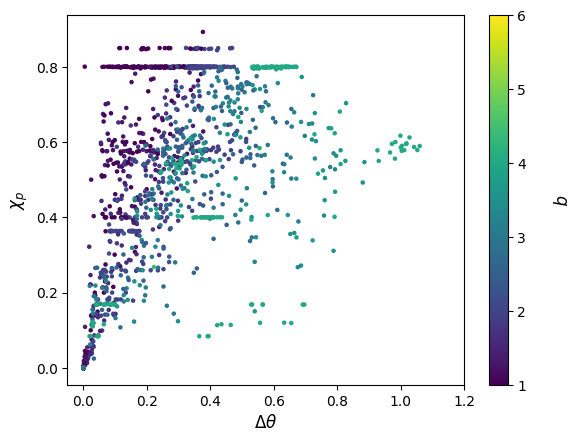

In [7]:
plt.scatter(Jdot_mis_angles,chi_ps,c=mass_ratios,vmax=6,vmin=1,s=5)
plt.xlim(-0.05,1.2)
cbar = plt.colorbar()
cbar.set_label('$q$', rotation=270,labelpad=30)

plt.ylabel('$\\chi_p$')
plt.xlabel('$\\Delta \\theta$')
plt.show()